In [ ]:
# Imports
# Numpy,Pandas
import numpy as np
import pandas as pd
import datetime

# matplotlib,seaborn,pyecharts
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


#  忽略弹出的warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: '%.4f' % x)


In [ ]:
data = pd.read_csv('/content/creditcard.csv')
print(data.shape)
data.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,-0.0183,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.2258,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.2480,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,-0.1083,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,-0.0094,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data['Hour'] = data['Time'].apply(lambda x: divmod(x, 3600)[0])
data.sample(5)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
231101,146613.0000,0.9895,-3.1218,-2.4176,-1.4906,0.6671,3.8495,-0.8631,0.8242,-0.1827,...,-0.3189,-0.1229,0.7113,-0.6871,-0.4805,-0.0783,0.0594,609.0000,0,40.0000
139215,83065.0000,1.3024,-0.6065,-0.6820,-1.9046,1.3266,3.4363,-1.1451,0.9591,1.6713,...,-0.0806,-0.0730,1.0181,0.6636,-0.6713,0.0968,0.0287,1.0000,0,23.0000
253749,156400.0000,-0.8098,2.0452,0.2620,2.6913,1.2450,-0.7344,1.4479,0.1289,-2.6561,...,0.2996,-0.3646,0.0253,0.4534,0.0958,-0.0946,0.0383,4.9500,0,43.0000
119560,75493.0000,1.2803,-0.4531,0.2715,0.2254,-0.2713,0.7327,-0.6552,0.0870,-0.8217,...,-0.2876,-0.1773,-1.3473,0.5157,-0.1900,0.0818,0.0293,51.0000,0,20.0000
163144,115688.0000,-1.0053,0.0607,0.6433,-2.0439,2.5404,4.0635,-0.1472,1.1873,0.2503,...,0.6732,-0.4095,0.7261,0.8833,-0.0950,0.0501,0.0571,43.0000,0,32.0000


In [ ]:
data.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour'],
      dtype='object')

In [ ]:
x_feature = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount','Hour']

X = data[x_feature]
y = data["Class"]


In [ ]:

missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)



Missing values in each column:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Hour      0
dtype: int64


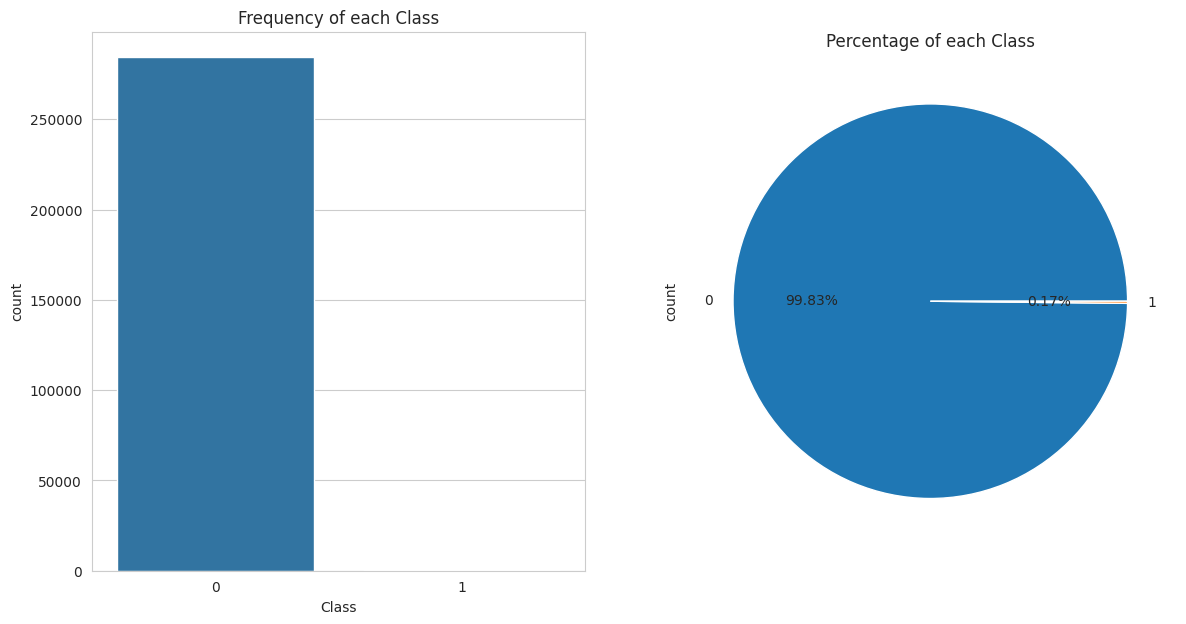

In [ ]:

fig, axs = plt.subplots(1,2,figsize=(14,7))

sns.countplot(x='Class',data=data,ax=axs[0])
axs[0].set_title("Frequency of each Class")

data['Class'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Percentage of each Class")
plt.show()


In [ ]:

fraud = data[data['Class'] == 1]
nonFraud = data[data['Class'] == 0]

correlationNonFraud = nonFraud.loc[:, data.columns != 'Class'].corr()
correlationFraud = fraud.loc[:, data.columns != 'Class'].corr()

mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True



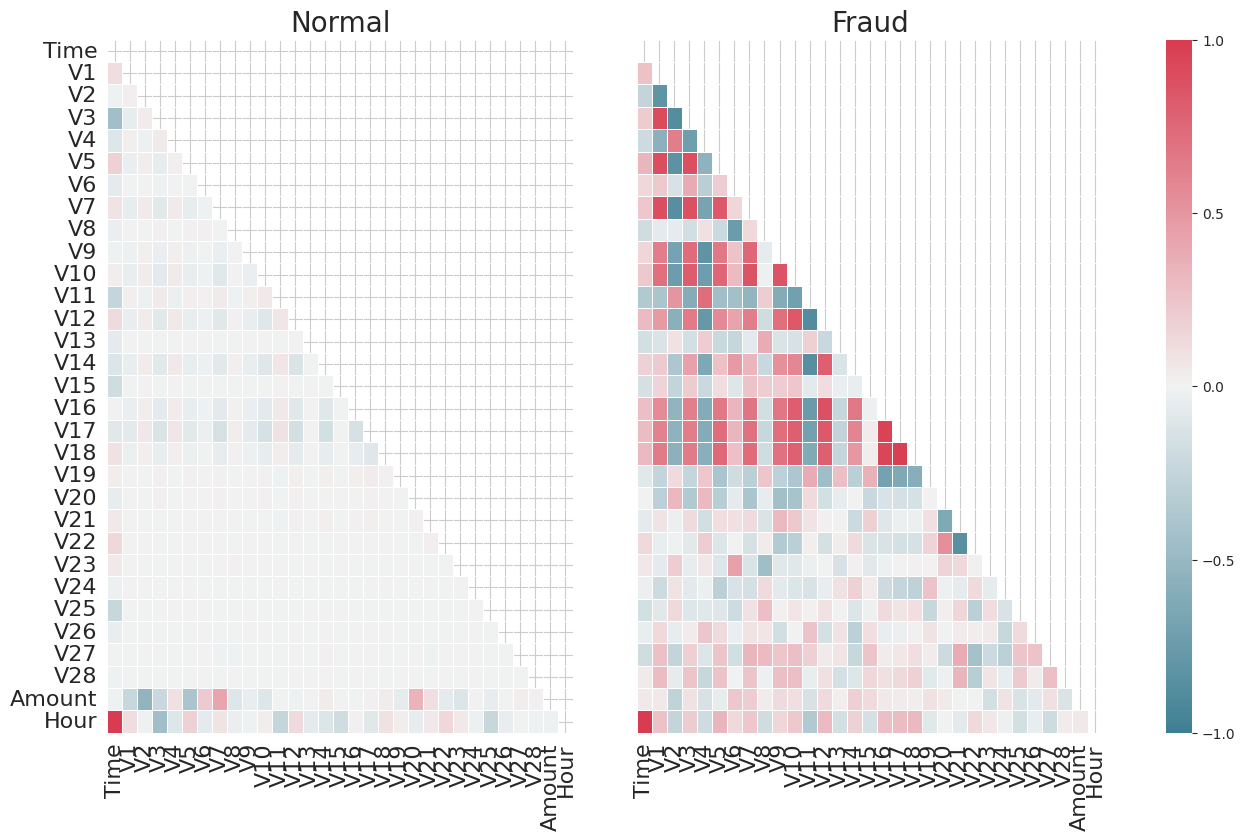

In [ ]:
grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, figsize = (14, 9))

# Normal user-feature correlation display
cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16);
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16);
ax1.set_title('Normal', size = 20)

# Defrauded user-feature correlation display
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16);
ax2.set_title('Fraud', size = 20);


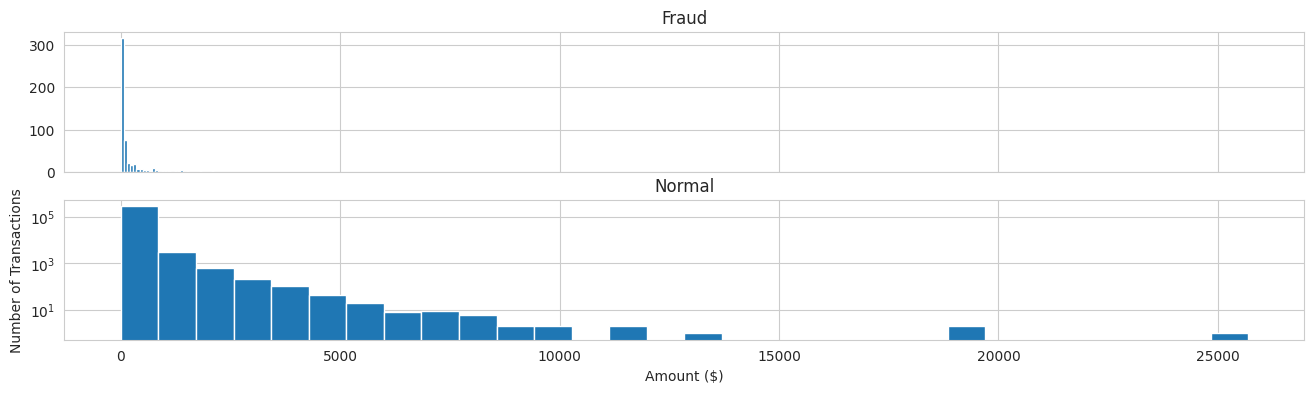

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,4))
bins = 30
ax1.hist(data["Amount"][data["Class"]== 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(data["Amount"][data["Class"] == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()


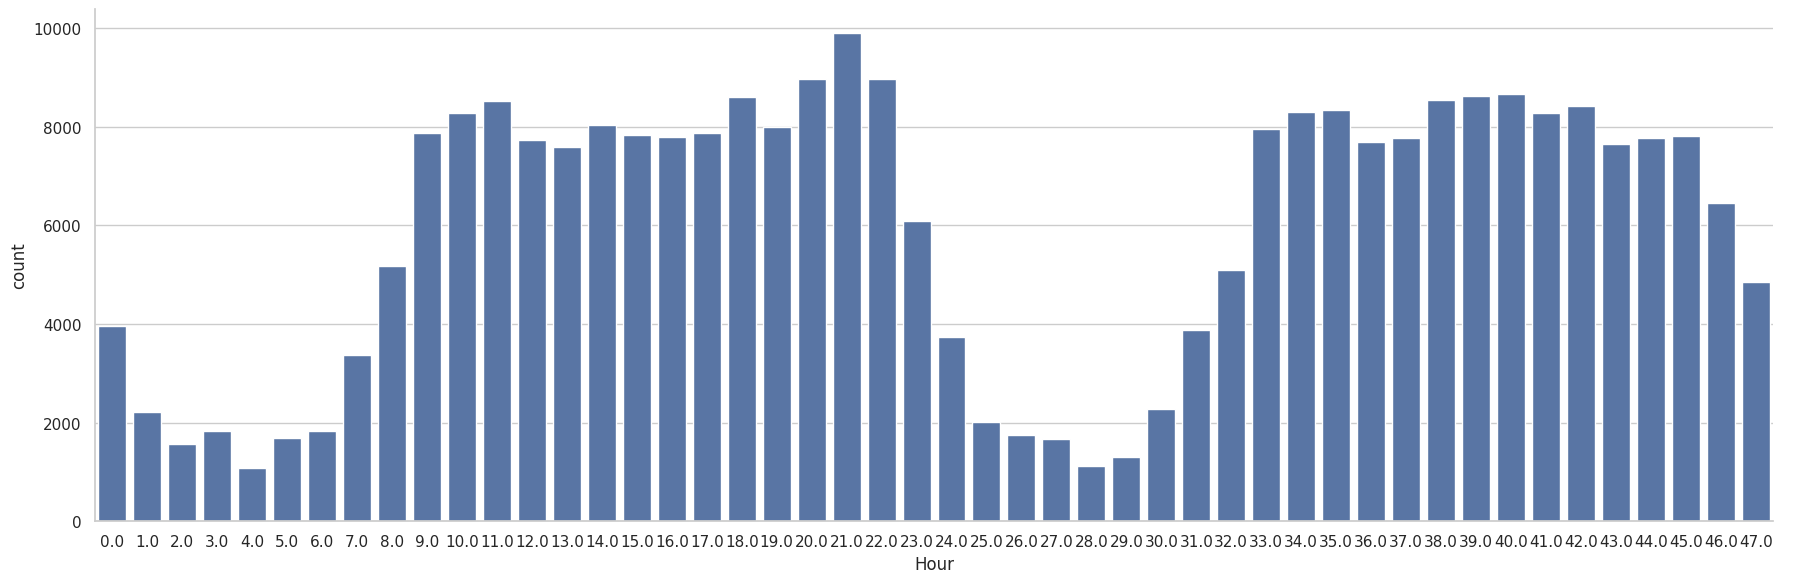

In [ ]:
sns.set(style="whitegrid")

g = sns.catplot(x="Hour", data=data, kind="count", height=6, aspect=3)

g.set_xticklabels(step=1)

plt.show()

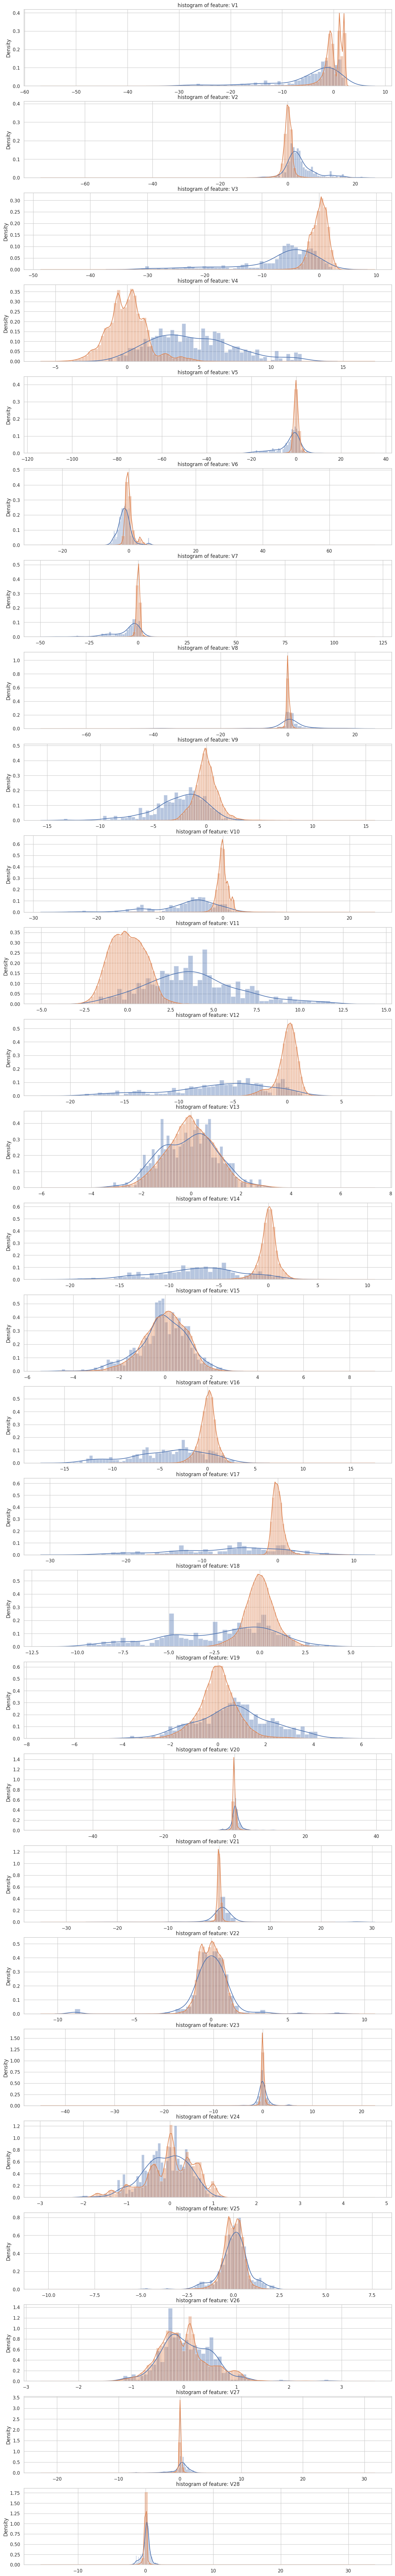

In [ ]:


v_feat_col = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15',
         'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
v_feat_col_size = len(v_feat_col)


plt.figure(figsize=(16,v_feat_col_size*4))
gs = gridspec.GridSpec(v_feat_col_size, 1)
for i, cn in enumerate(data[v_feat_col]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[cn][data["Class"] == 1], bins=50)
    sns.distplot(data[cn][data["Class"] == 0], bins=100)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))


In [ ]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0000,-1.3598,-0.0728,2.5363,1.3782,-0.3383,0.4624,0.2396,0.0987,0.3638,...,0.2778,-0.1105,0.0669,0.1285,-0.1891,0.1336,-0.0211,149.6200,0,0.0000
1,0.0000,1.1919,0.2662,0.1665,0.4482,0.0600,-0.0824,-0.0788,0.0851,-0.2554,...,-0.6387,0.1013,-0.3398,0.1672,0.1259,-0.0090,0.0147,2.6900,0,0.0000
2,1.0000,-1.3584,-1.3402,1.7732,0.3798,-0.5032,1.8005,0.7915,0.2477,-1.5147,...,0.7717,0.9094,-0.6893,-0.3276,-0.1391,-0.0554,-0.0598,378.6600,0,0.0000
3,1.0000,-0.9663,-0.1852,1.7930,-0.8633,-0.0103,1.2472,0.2376,0.3774,-1.3870,...,0.0053,-0.1903,-1.1756,0.6474,-0.2219,0.0627,0.0615,123.5000,0,0.0000
4,2.0000,-1.1582,0.8777,1.5487,0.4030,-0.4072,0.0959,0.5929,-0.2705,0.8177,...,0.7983,-0.1375,0.1413,-0.2060,0.5023,0.2194,0.2152,69.9900,0,0.0000


In [ ]:

droplist = ['V8', 'V13', 'V15', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','Time']
data_new = data.drop(droplist, axis = 1)
print(data_new.shape)
data_new.tail()


(284807, 19)


,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
284802,-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,1.9144,4.3562,-1.5931,2.7119,4.6269,1.1076,1.9917,0.5106,-0.6829,0.7700,0,47.0000
284803,-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.5848,-0.9759,-0.1502,0.9158,-0.6751,-0.7118,-0.0257,-1.2212,-1.5456,24.7900,0,47.0000
284804,1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.4325,-0.4848,0.4116,0.0631,-0.5106,0.1407,0.3135,0.3957,-0.5773,67.8800,0,47.0000
284805,-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.3921,-0.3991,-1.9338,-0.9629,0.4496,-0.6086,0.5099,1.1140,2.8978,10.0000,0,47.0000
284806,-0.5334,-0.1897,0.7033,-0.5063,-0.0125,-0.6496,1.5770,0.4862,-0.9154,-1.0405,-0.0315,-0.0843,-0.3026,-0.6604,0.1674,-0.2561,217.0000,0,47.0000


In [ ]:

col = ['Amount','Hour']
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
data_new[col] =sc.fit_transform(data_new[col])
data_new.tail()


,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
284802,-11.8811,10.0718,-9.8348,-2.0667,-5.3645,-2.6068,-4.9182,1.9144,4.3562,-1.5931,2.7119,4.6269,1.1076,1.9917,0.5106,-0.6829,-0.3502,0,1.6044
284803,-0.7328,-0.0551,2.0350,-0.7386,0.8682,1.0584,0.0243,0.5848,-0.9759,-0.1502,0.9158,-0.6751,-0.7118,-0.0257,-1.2212,-1.5456,-0.2541,0,1.6044
284804,1.9196,-0.3013,-3.2496,-0.5578,2.6305,3.0313,-0.2968,0.4325,-0.4848,0.4116,0.0631,-0.5106,0.1407,0.3135,0.3957,-0.5773,-0.0818,0,1.6044
284805,-0.2404,0.5305,0.7025,0.6898,-0.3780,0.6237,-0.6862,0.3921,-0.3991,-1.9338,-0.9629,0.4496,-0.6086,0.5099,1.1140,2.8978,-0.3132,0,1.6044
284806,-0.5334,-0.1897,0.7033,-0.5063,-0.0125,-0.6496,1.5770,0.4862,-0.9154,-1.0405,-0.0315,-0.0843,-0.3026,-0.6604,0.1674,-0.2561,0.5144,0,1.6044


In [ ]:
data_new.describe().T


,count,mean,std,min,25%,50%,75%,max
V1,284807.0000,0.0000,1.9587,-56.4075,-0.9204,0.0181,1.3156,2.4549
V2,284807.0000,0.0000,1.6513,-72.7157,-0.5985,0.0655,0.8037,22.0577
V3,284807.0000,-0.0000,1.5163,-48.3256,-0.8904,0.1798,1.0272,9.3826
V4,284807.0000,0.0000,1.4159,-5.6832,-0.8486,-0.0198,0.7433,16.8753
V5,284807.0000,0.0000,1.3802,-113.7433,-0.6916,-0.0543,0.6119,34.8017
V6,284807.0000,0.0000,1.3323,-26.1605,-0.7683,-0.2742,0.3986,73.3016
V7,284807.0000,-0.0000,1.2371,-43.5572,-0.5541,0.0401,0.5704,120.5895
V9,284807.0000,-0.0000,1.0986,-13.4341,-0.6431,-0.0514,0.5971,15.5950
V10,284807.0000,0.0000,1.0888,-24.5883,-0.5354,-0.0929,0.4539,23.7451
V11,284807.0000,0.0000,1.0207,-4.7975,-0.7625,-0.0328,0.7396,12.0189


In [ ]:
x_feature = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'Amount',  'Hour']
x_val = data_new[x_feature]
y_val = data_new['Class']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10,random_state=123,max_depth=4)#构建分类随机森林分类器
clf.fit(x_val, y_val) #对自变量和因变量进行拟合


RandomForestClassifier(max_depth=4, n_estimators=10, random_state=123)

In [ ]:
for feature in zip(x_feature,clf.feature_importances_):
    print(feature)


('V1', 0.0008826091438778425)
('V2', 0.0021058185061093608)
('V3', 0.009750867340434583)
('V4', 0.01751094043420745)
('V5', 0.008600547467227002)
('V6', 0.013298075656335426)
('V7', 0.0086835897086001)
('V9', 0.023090145788325165)
('V10', 0.08528888657921369)
('V11', 0.06537921978883558)
('V12', 0.14194613523236163)
('V14', 0.13109127164220205)
('V16', 0.19729822871872432)
('V17', 0.27966491161168533)
('V18', 0.009405287105749225)
('V19', 0.0002669771829968763)
('Amount', 0.0017493348363684953)
('Hour', 0.003987153256745854)


(-1.0, 18.0)

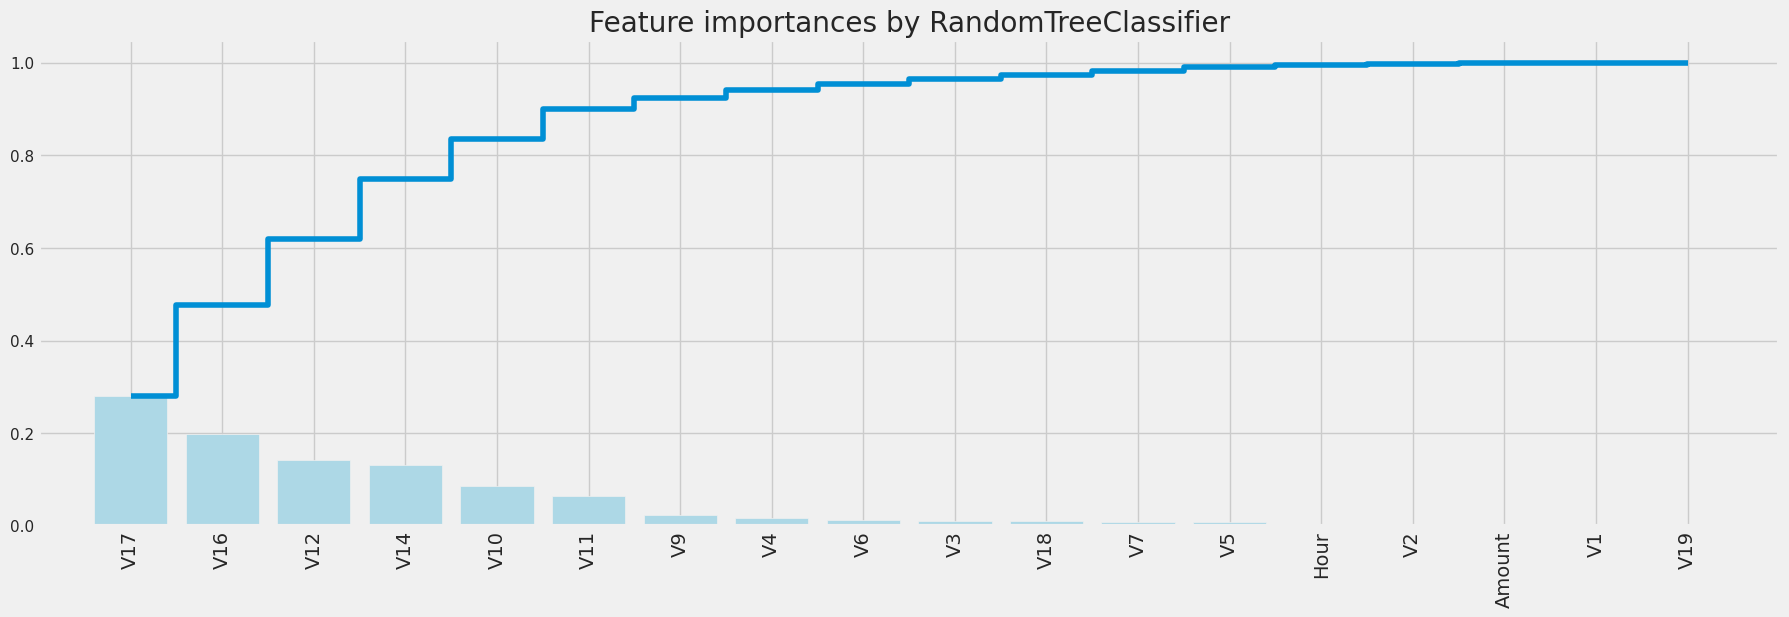

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

importances = clf.feature_importances_
feat_names = data_new[x_feature].columns
indices = np.argsort(importances)[::-1]
fig = plt.figure(figsize=(20,6))
plt.title("Feature importances by RandomTreeClassifier")

x = list(range(len(indices)))

plt.bar(x, importances[indices], color='lightblue',  align="center")
plt.step(x, np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(x, feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])


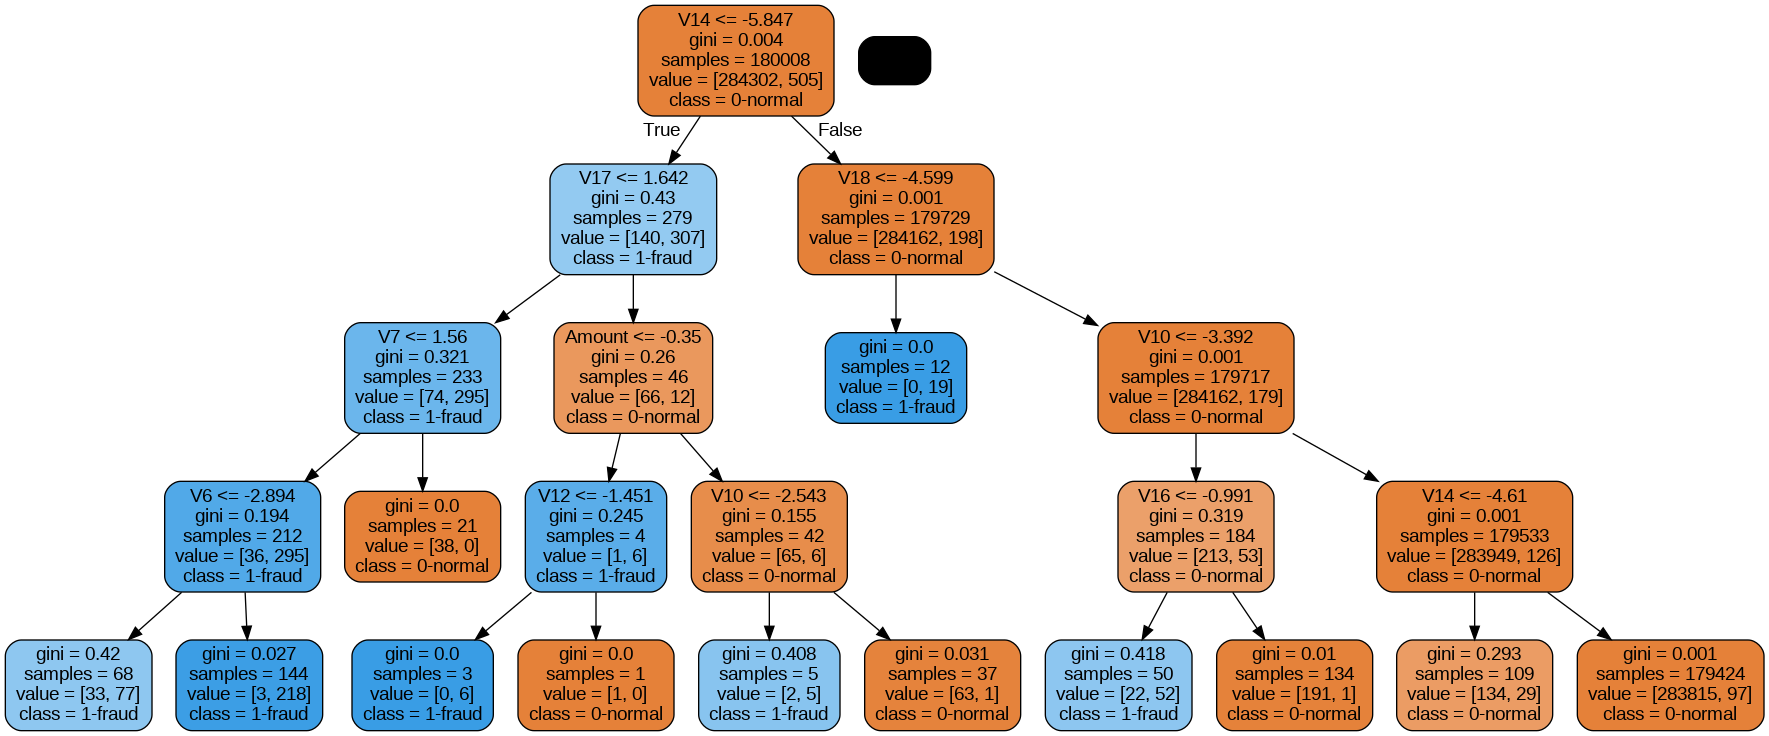

In [ ]:
from sklearn import tree
estimator = clf.estimators_[5]

import pydotplus
from IPython.display import display, Image

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = tree.export_graphviz(estimator,
                                out_file=None,
                                feature_names=x_feature,
                                class_names = ['0-normal', '1-fraud'],
                                filled = True,
                                rounded =True
                               )
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))


In [ ]:
# Lets shuffle the data before creating the subsamples
df = data_new.sample(frac=1)
# amount of fraud classes 492 rows.
fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0][:492]

normal_distributed = pd.concat([fraud, non_fraud])

# Shuffle dataframe rows
new = normal_distributed.sample(frac=1, random_state=42)
print(new.shape)
new.head()


(984, 19)


,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount,Class,Hour
211969,-2.8665,-2.3312,-0.3536,0.5551,0.5284,0.0966,3.8709,-0.9670,-1.3254,-1.2379,-0.4165,0.2936,-0.4489,-0.5557,-0.1560,-0.8937,2.9493,0,0.9218
189878,-5.3138,2.6643,-4.2507,0.3947,-0.3914,0.6835,-5.1337,0.2155,-2.2977,1.9615,-1.9444,-4.3463,-1.8204,-3.7465,-0.8804,0.2679,-0.3492,1,0.6943
34357,-0.3359,0.9716,1.6832,1.1588,0.1510,-0.3651,0.7611,-0.3937,0.2765,0.0144,-0.3456,0.2160,-0.7966,0.2115,-0.2940,0.1345,-0.3053,0,-1.2018
43773,-3.2402,2.9781,-4.1623,3.8691,-3.6453,-0.1263,-4.7447,-2.1684,-4.7583,3.4711,-6.5331,-6.0740,-7.7180,-9.8559,-5.1939,2.0427,0.3357,1,-1.1260
150663,-5.8392,7.1515,-12.8168,7.0311,-9.6513,-2.9384,-11.5432,-3.4943,-13.3208,8.4602,-17.0033,-14.0945,-12.6617,-18.9125,-6.6270,4.0089,0.9104,1,0.0117


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

print("\nTraining set class distribution:")
print(y_train.value_counts())

print("\nTest set class distribution:")
print(y_test.value_counts())


Training set size: 199364
Test set size: 85443

Training set class distribution:
Class
0    199020
1       344
Name: count, dtype: int64

Test set class distribution:
Class
0    85295
1      148
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Build features (X) and target (y)
X = data[x_feature]
y = data["Class"]

# Print sample and feature details
n_sample = y.shape[0]
n_pos_sample = y[y == 1].shape[0]
n_neg_sample = y[y == 0].shape[0]
print('Total samples: {}; Positive samples: {:.2%}; Negative samples: {:.2%}'.format(
    n_sample,
    n_pos_sample / n_sample,
    n_neg_sample / n_sample
))
print('Number of features:', X.shape[1])

# 1. Prepare the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Print counts before SMOTE
n_train_sample = y_train.shape[0]
n_train_pos_sample = y_train[y_train == 1].shape[0]
n_train_neg_sample = y_train[y_train == 0].shape[0]
print('\nBefore SMOTE:')
print('Training samples: {}'.format(n_train_sample))
print('Positive samples: {}'.format(n_train_pos_sample))
print('Negative samples: {}'.format(n_train_neg_sample))
print('Positive sample proportion: {:.2%}'.format(n_train_pos_sample / n_train_sample))
print('Negative sample proportion: {:.2%}'.format(n_train_neg_sample / n_train_sample))

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Print counts after SMOTE
n_train_resampled_sample = y_train_resampled.shape[0]
n_train_resampled_pos_sample = y_train_resampled[y_train_resampled == 1].shape[0]
n_train_resampled_neg_sample = y_train_resampled[y_train_resampled == 0].shape[0]
print('\nAfter SMOTE:')
print('Resampled training samples: {}'.format(n_train_resampled_sample))
print('Positive samples: {}'.format(n_train_resampled_pos_sample))
print('Negative samples: {}'.format(n_train_resampled_neg_sample))
print('Positive sample proportion: {:.2%}'.format(n_train_resampled_pos_sample / n_train_resampled_sample))
print('Negative sample proportion: {:.2%}'.format(n_train_resampled_neg_sample / n_train_resampled_sample))


Total samples: 284807; Positive samples: 0.17%; Negative samples: 99.83%
Number of features: 18

Before SMOTE:
Training samples: 199364
Positive samples: 344
Negative samples: 199020
Positive sample proportion: 0.17%
Negative sample proportion: 99.83%

After SMOTE:
Resampled training samples: 398040
Positive samples: 199020
Negative samples: 199020
Positive sample proportion: 50.00%
Negative sample proportion: 50.00%


In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, classification_report
)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Store trained models
trained_models = {}

# Train and evaluate the models
for name, model in models.items():
    print(f"Training {name}...")

    # Fit the model on the training data
    model.fit(X_train_resampled, y_train_resampled)

    # Store the trained model
    trained_models[name] = model

    # Make predictions on the training set
    y_train_pred = model.predict(X_train_resampled)

    # Make predictions on the test set
    y_test_pred = model.predict(X_test)

    # Calculate metrics for the training set
    accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
    precision_train = precision_score(y_train_resampled, y_train_pred)
    recall_train = recall_score(y_train_resampled, y_train_pred)
    f1_train = f1_score(y_train_resampled, y_train_pred)
    roc_auc_train = roc_auc_score(y_train_resampled, y_train_pred)

    # Calculate metrics for the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)

    # Print performance metrics
    print(f"\nPerformance of {name}:")


    print(f"\nPerformance on Test Set:")
    print(f"Accuracy: {accuracy_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"Recall: {recall_test:.4f}")
    print(f"F1 Score: {f1_test:.4f}")
    print(f"ROC AUC: {roc_auc_test:.4f}")
    print("-" * 40)


Training Logistic Regression...

Performance of Logistic Regression:

Performance on Test Set:
Accuracy: 0.9795
Precision: 0.0684
Recall: 0.8581
F1 Score: 0.1267
ROC AUC: 0.9189
----------------------------------------
Training Random Forest...

Performance of Random Forest:

Performance on Test Set:
Accuracy: 0.9984
Precision: 0.5322
Recall: 0.8378
F1 Score: 0.6509
ROC AUC: 0.9183
----------------------------------------
Training XGBoost...

Performance of XGBoost:

Performance on Test Set:
Accuracy: 0.9980
Precision: 0.4555
Recall: 0.8649
F1 Score: 0.5967
ROC AUC: 0.9315
----------------------------------------


In [ ]:
# Standard libraries
import numpy as np
import pandas as pd

# Scikit-learn for machine learning models and utilities
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split

# Imbalanced-learn for handling imbalanced datasets
from imblearn.over_sampling import SMOTE

# TensorFlow/Keras for deep learning models
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Matplotlib for plotting
import matplotlib.pyplot as plt


from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
# 1. 准备数据
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


# 训练深度学习模型
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

dl_model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
dl_model.fit(X_train_resampled, y_train_resampled,
             epochs=100,
             batch_size=32,
             validation_split=0.2,
             callbacks=[early_stopping],
             verbose=1)

# 获取深度学习模型的预测概率
train_predictions = dl_model.predict(X_train_resampled).flatten()
test_predictions = dl_model.predict(X_test).flatten()

# 打印训练集和测试集的预测结果
print("Training set predictions:")
print(train_predictions[:10])  # 打印前10个预测概率

print("\nTest set predictions:")
print(test_predictions[:10])  # 打印前10个预测概率

# 打印深度学习模型的性能评估指标
y_train_pred_dl = (train_predictions > 0.5).astype(int)
y_test_pred_dl = (test_predictions > 0.5).astype(int)

print("\nPerformance on Training Set:")
print(f"Accuracy: {accuracy_score(y_train_resampled, y_train_pred_dl)}")
print(f"Precision: {precision_score(y_train_resampled, y_train_pred_dl)}")
print(f"Recall: {recall_score(y_train_resampled, y_train_pred_dl)}")
print(f"F1 Score: {f1_score(y_train_resampled, y_train_pred_dl)}")
print(f"ROC AUC: {roc_auc_score(y_train_resampled, train_predictions)}")

print("\nPerformance on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_dl)}")
print(f"Precision: {precision_score(y_test, y_test_pred_dl)}")
print(f"Recall: {recall_score(y_test, y_test_pred_dl)}")
print(f"F1 Score: {f1_score(y_test, y_test_pred_dl)}")
print(f"ROC AUC: {roc_auc_score(y_test, test_predictions)}")


Epoch 1/100
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.8985 - loss: 0.7469 - val_accuracy: 0.9567 - val_loss: 0.0969
Epoch 2/100
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9753 - loss: 0.0741 - val_accuracy: 0.9750 - val_loss: 0.0632
Epoch 3/100
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 39s 2ms/step - accuracy: 0.9810 - loss: 0.0587 - val_accuracy: 0.9775 - val_loss: 0.0461
Epoch 4/100
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9836 - loss: 0.0527 - val_accuracy: 0.9901 - val_loss: 0.0260
Epoch 5/100
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9856 - loss: 0.0479 - val_accuracy: 0.9863 - val_loss: 0.0408
Epoch 6/100
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9861 - loss: 0.0450 - val_accuracy: 0.9920 - val_loss: 0.0222
Epoch 7/100
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9873 - loss: 0.0408 - val_accuracy: 0.9810 - val_loss: 0.0449
Epoch 8/100
9951/9951 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.9881 -